# Introduction
## What is Customer Churn?
Customer churn or customer attrition is the measure of the percentage of customers that stopped doing business or using a company's service during a certain time frame.
The number is simply calculated by dividing the number of customers lost during a certain time period over the number of customers at the beginning of that time period.

## Why is it important?
In most businesses, it is less expensive to retain existing customers than gaining new customers in place of churned customers. This is because earning business from new customers means working leads all the way through the sales funnel, utilizing your marketing and sales resources throughout the process. Customer retention, on the other hand, is generally more cost-effective as you’ve already earned the trust and loyalty of existing customers.

# Dataset Overview
We are working with a kaggle dataset [Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn) containing information about 7,043 customers and if they are still in service with the company.

| Attribute | Description |
|:-|:-|
| customerId | Customer Id |
| gender | Whether the customer is a male or a female |
| SeniorCitizen | Whether the customer is a senior citizen or not (1, 0) |
| Partner | Whether the customer has a partner or not (Yes, No) |
| Dependents | Whether the customer has dependents or not (Yes, No) |
| tenure | Number of months the customer has stayed with the company |
| PhoneService | Whether the customer has a phone service or not (Yes, No) |
| MultipleLines | Whether the customer has multiple lines or not (Yes, No, No phone service) |
| InternetService | Customer’s internet service provider (DSL, Fiber optic, No) |
| OnlineSecurity | Whether the customer has online security or not (Yes, No, No internet service) |
| OnlineBackup | Whether the customer has online backup or not (Yes, No, No internet service) |
| DeviceProtection | Whether the customer has device protection or not (Yes, No, No internet service) |
| TechSupport | Whether the customer has tech support or not (Yes, No, No internet service) |
| StreamingTV | Whether the customer has streaming TV or not (Yes, No, No internet service) |
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service) |
| Contract | The contract term of the customer (Month-to-month, One year, Two year) |
| PaperlessBilling | Whether the customer has paperless billing or not (Yes, No) |
| PaymentMethod | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)) |
| MonthlyCharges | The amount charged to the customer monthly |
| TotalCharges | The total amount charged to the customer |
| Churn | Whether the customer churned or not (Yes or No) |

In [21]:
#loading libraries
import numpy as np
import pandas as pd

import os

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import timeit

%matplotlib inline

In [22]:
#load data
data = pd.read_csv(r"../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The number of enteries are 7043 with no NAN (for now), and we have 21 attributes including the ID.
Most of the attributes have the wrong type, we should assign them the right data type to avoid problems down the line.

In [4]:
#Unique values in each attribute
for item in data.columns:
    print(f"Unique {item}'s count: {data[item].nunique()}")
    print(f"{data[item].unique()}\n\n")

Unique customerID's count: 7043
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']


Unique gender's count: 2
['Female' 'Male']


Unique SeniorCitizen's count: 2
[0 1]


Unique Partner's count: 2
['Yes' 'No']


Unique Dependents's count: 2
['No' 'Yes']


Unique tenure's count: 73
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


Unique PhoneService's count: 2
['No' 'Yes']


Unique MultipleLines's count: 3
['No phone service' 'No' 'Yes']


Unique InternetService's count: 3
['DSL' 'Fiber optic' 'No']


Unique OnlineSecurity's count: 3
['No' 'Yes' 'No internet service']


Unique OnlineBackup's count: 3
['Yes' 'No' 'No internet service']


Unique DeviceProtection's count: 3
['No' 'Yes' 'No internet service']


Unique TechSupport's count: 3
['No' 'Yes' 'No internet service']


Unique 

While converting the attribute data types to categories and `int64`, it works well, but we get an error when assigning type `float64` to `TotalCharges`

In [5]:
catCols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", 
           "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", 
           "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
data[catCols] = data[catCols].astype('category') # change columns to type category

data["tenure"] = data["tenure"].astype('int64') # change columns to type int64

# Converting totalcharges column to float gives an error, lets find out why
# data["TotalCharges"] = data["TotalCharges"].astype('float64') # change columns to type float64


In [6]:
tCharges = data.sort_values('TotalCharges')
tCharges['TotalCharges'].head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


We see that 11 values are empty strings (they didnt show as NA's earlier). And looking at the columns, it seems the missing values are arbitrary. So rather than imputing zeros, we will remove the entire rows as it's only 0.15% of the entire data.

In [7]:
#convert empty strings to NAN (actually there is one space)
data['TotalCharges'] = data["TotalCharges"].replace(" ",np.nan)

#remove nulls and reset index
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

#convert to float64
data["TotalCharges"] = data["TotalCharges"].astype(float)

We notice that some of the attributes have redundant values like MultipleLines with `No` and `No phone service`, we can combine those to make it easier for the classifier down the line.

In [8]:
colsForReplacement = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']

for colName in colsForReplacement:
    data[colName] = data[colName].replace({'No internet service' : 'No'})

And for SeniorCitizen column, we should convert it to `Yes` and `No` to maintain consistency.

In [9]:
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [10]:
#lets convert the types again as we did alot of changes and they reverted back to `object` type
catCols = ["gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "InternetService", "OnlineSecurity", 
           "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "MultipleLines",
           "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]
data[catCols] = data[catCols].astype('category') # change columns to type category

# Converting totalcharges column to float gives an error, lets find out why
data["TotalCharges"] = data["TotalCharges"].astype('float64') # change columns to type float64

# data["Churn"] = data["Churn"].astype('bool')

Exploratory analysis

In [11]:
#split churned and didnt churn
churn = data[data['Churn']=='Yes']
no_churn = data[data['Churn']=='No']

#Separating catagorical and numerical columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols   = [x for x in data.columns if x not in num_cols + ['customerID', 'Churn']]

In [12]:
#function to plot count barcharts for all categorical attributes
def drawBar(churn, no_churn, column):  
    fig = plt.figure(figsize=(13,4.5))
    plt.subplots_adjust(hspace=0.25)
    
    def bar_subplot(is_churn=True):
        #assign variables based on is_churn
        data, plot = [churn, '121'] if is_churn else [no_churn, '122']
        title = f'Churn - {column}' if is_churn else f'No Churn - {column}'
        data_vals = data[column].value_counts().sort_values()
        
        fig.add_subplot(plot)
        plt.title(title, fontsize=17)
        if(column == 'PaymentMethod'): plt.xticks(rotation=20)
        for i, item in enumerate(data_vals):
            plt.text(i, item+data_vals.max()*.018, "{:0.2f}%".format(item/data_vals.sum()*100), 
                     horizontalalignment='center', verticalalignment='center',color='black')
        sns.countplot(data=data, x=column, order=data[column].value_counts(ascending=True).index)
    
    bar_subplot(True)
    bar_subplot(False)    

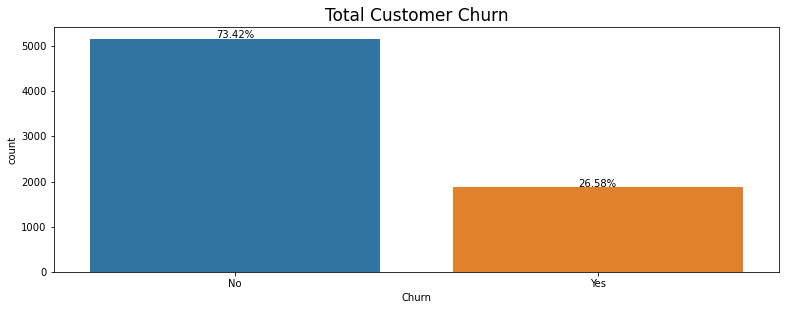

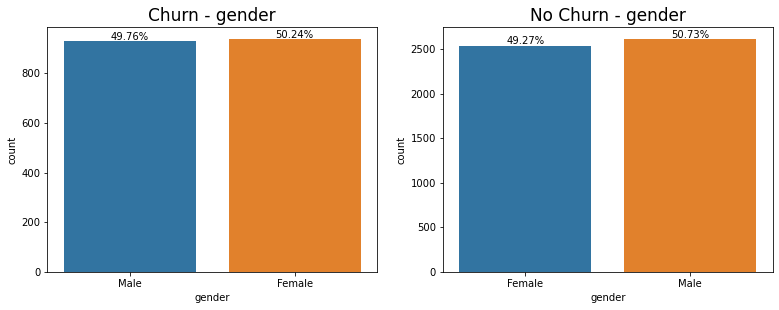

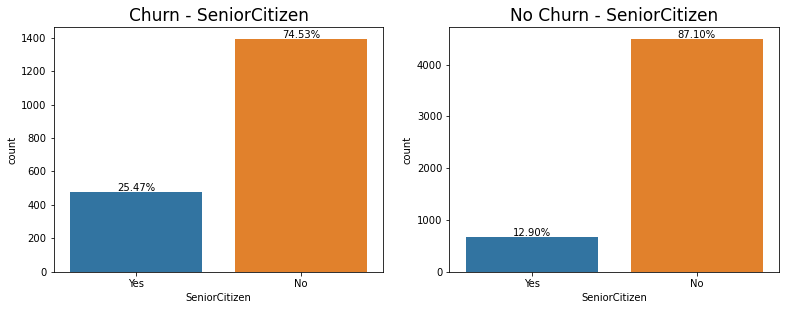

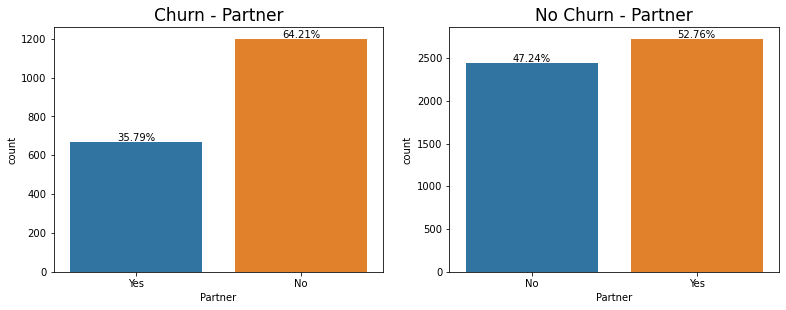

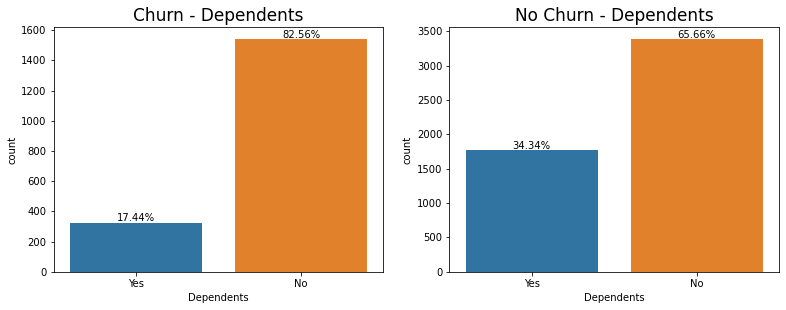

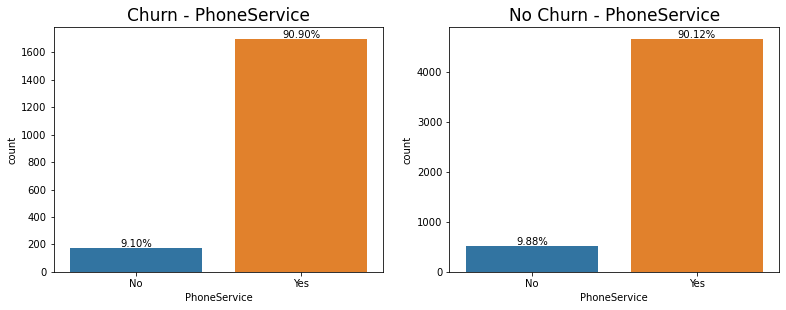

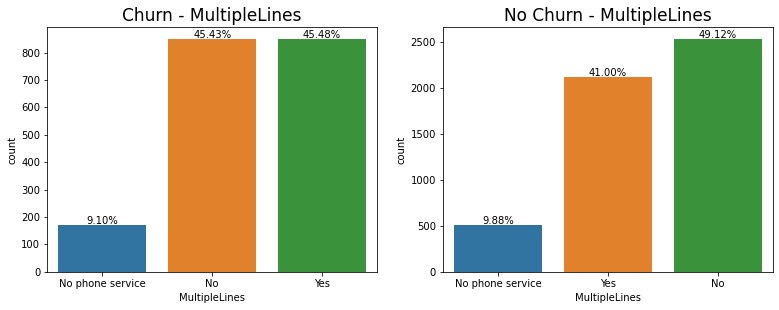

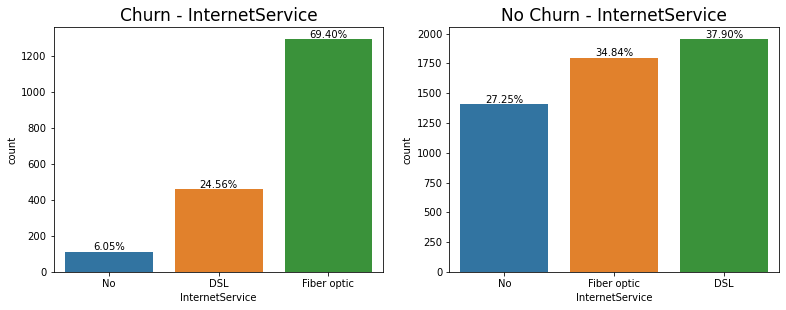

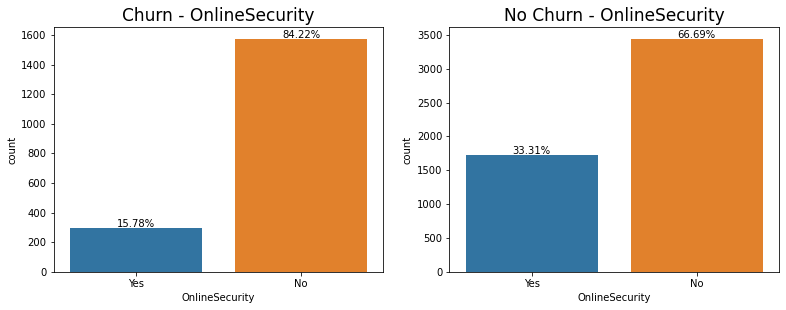

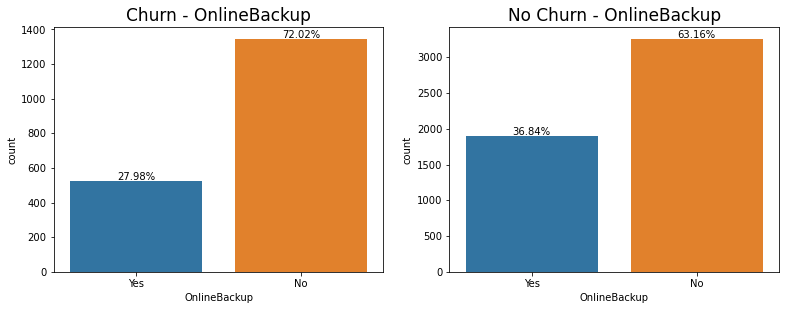

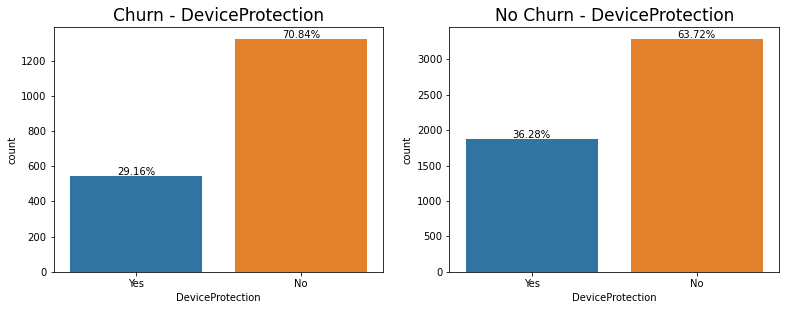

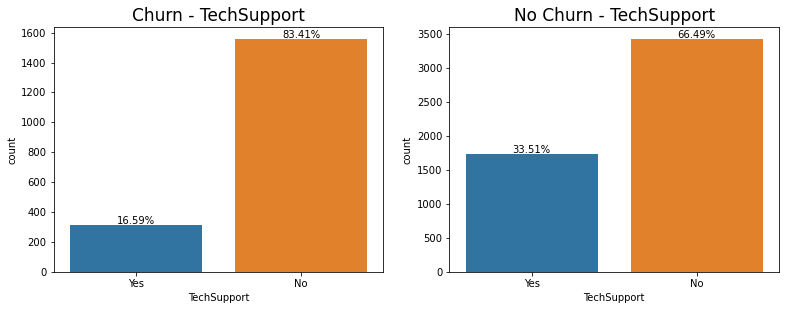

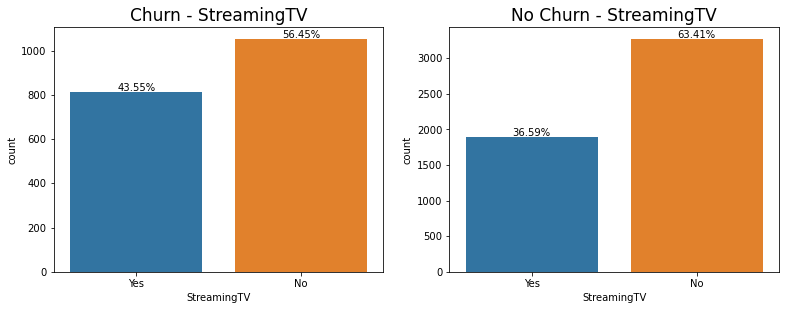

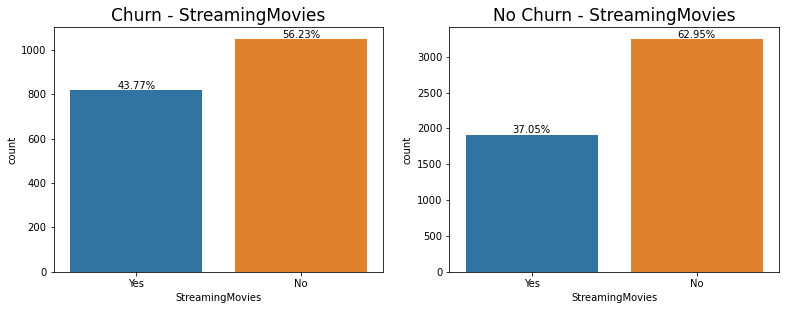

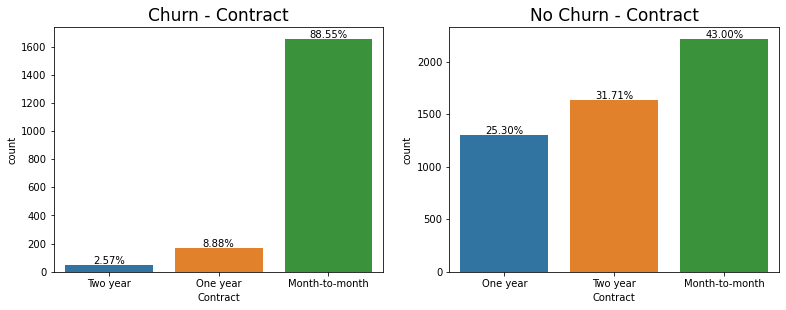

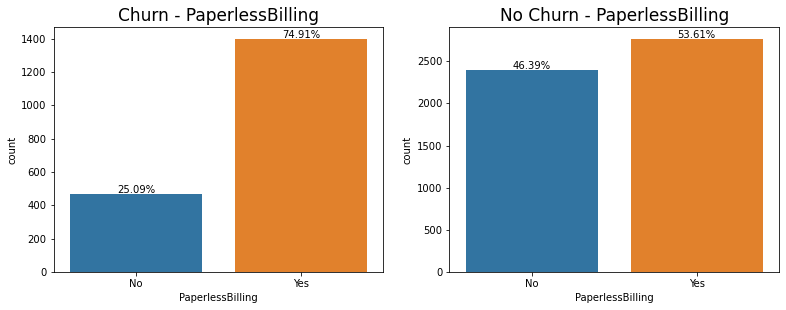

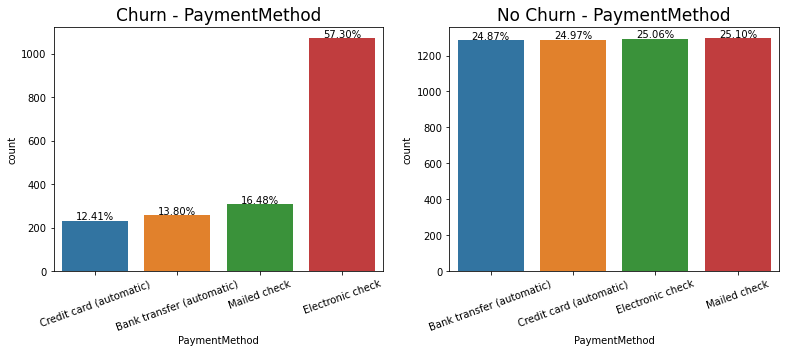

In [13]:
#Plot counts of churned and didnt churn
total_churn_vals = data['Churn'].value_counts().sort_values()

plt.figure(figsize=(13,4.5))
plt.title('Total Customer Churn', fontsize=17)
plt.text(0,total_churn_vals[0]+80, "{:0.2f}%".format(total_churn_vals[0]/total_churn_vals.sum()*100), 
         horizontalalignment='center', verticalalignment='center', color='black')
plt.text(1,total_churn_vals[1]+80 , "{:0.2f}%".format(total_churn_vals[1]/total_churn_vals.sum()*100), 
         horizontalalignment='center', verticalalignment='center', color='black')
# plt.axis('off')
sns.countplot(data=data, x='Churn')

#Plot all catagorical variables distribution
for colName in cat_cols:
    drawBar(churn, no_churn, colName)

In [14]:
# fig = plt.figure(figsize=(15,10))

# #  subplot #1
# fig.add_subplot(311)
# plt.title('Tenure distribution', fontsize=14)
# ax=sns.countplot(data=data, x='tenure',hue='Churn')
# ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# #  subplot #2
# fig.add_subplot(312)
# plt.title('MonthlyCharges distribution', fontsize=14)
# ax=sns.countplot(data=data, x='MonthlyCharges',hue='Churn')

# ax.xaxis.set_major_locator(ticker.MultipleLocator(20))
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# #  subplot #3
# fig.add_subplot(313)
# plt.title('TotalCharges distribution', fontsize=14)
# ax=sns.countplot(data=data, x='TotalCharges',hue='Churn')

# ax.xaxis.set_major_locator(ticker.MultipleLocator(1500))
# ax.xaxis.set_major_formatter(ticker.ScalarFormatter())

# plt.show()

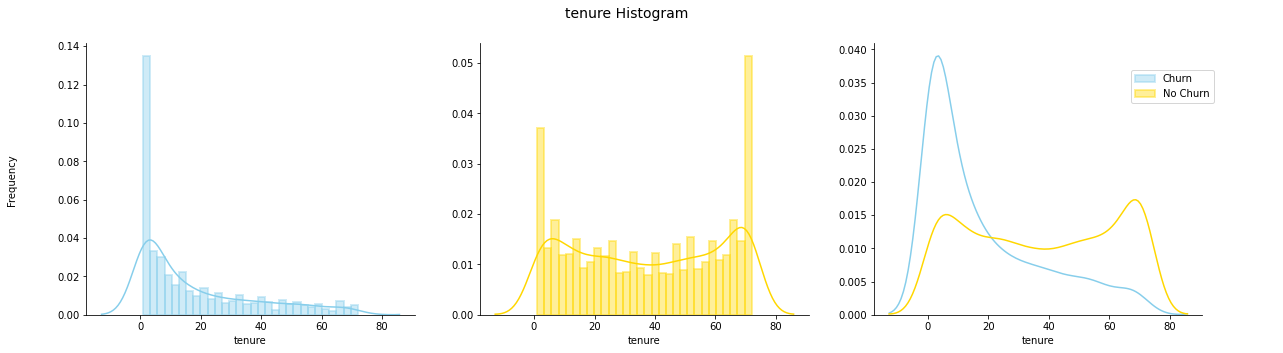

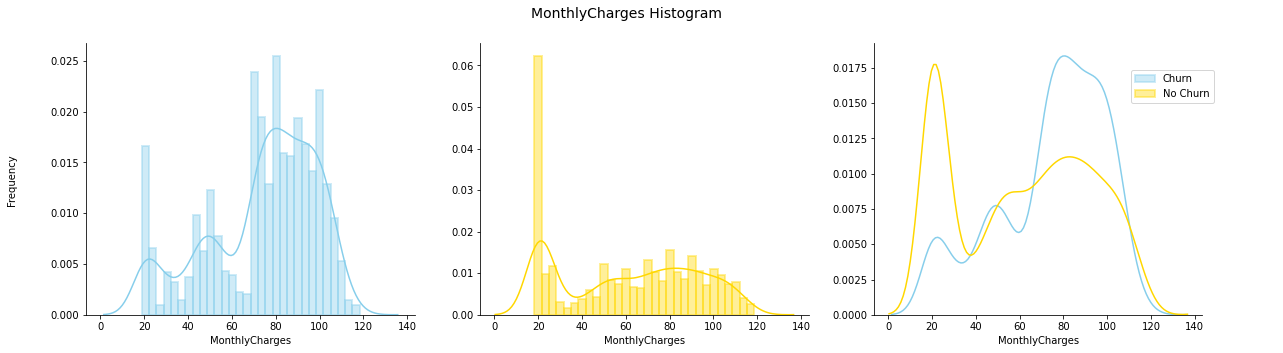

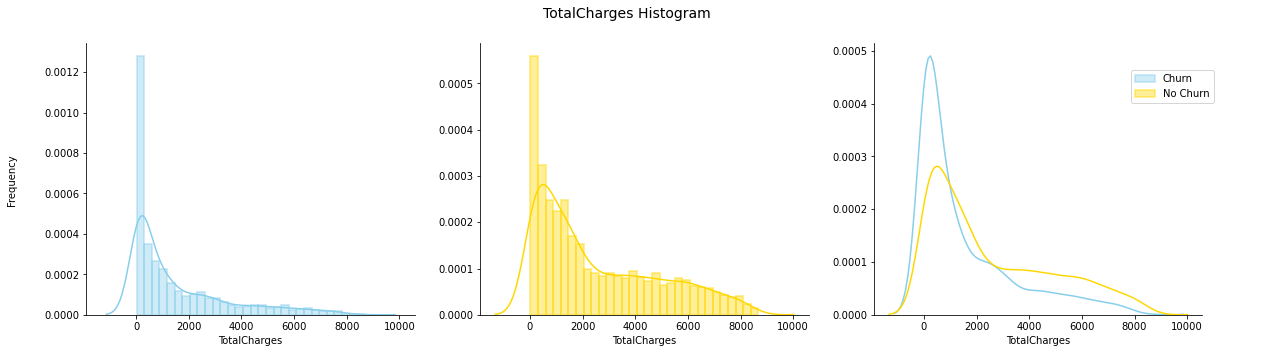

In [15]:
def plot_dist(churn, no_churn, attr):
    f, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True) 
    ax1=sns.distplot(churn[attr] , color="skyblue", ax=axes[0], bins=30,
                     hist_kws=dict(edgecolor="skyblue", linewidth=2)) 

    ax2=sns.distplot(no_churn[attr] , color="gold", ax=axes[1], bins=30,
                     hist_kws=dict(edgecolor="gold", linewidth=2))

    ax3=sns.kdeplot(churn[attr] , color="skyblue", ax=axes[2], legend=False)
    ax3=sns.kdeplot(no_churn[attr] , color="gold", ax=axes[2], legend=False)
    ax3.set_xlabel(attr)
    
    sns.despine(top=True, right=True)
    f.text(0.07, 0.5, 'Frequency', va='center', rotation='vertical')
    f.suptitle(f'{attr} Histogram', fontsize=14)
    f.legend(labels=['Churn','No Churn'], loc=1, borderaxespad=7)

plot_dist(churn, no_churn, "tenure")
plot_dist(churn, no_churn, "MonthlyCharges")
plot_dist(churn, no_churn, "TotalCharges")

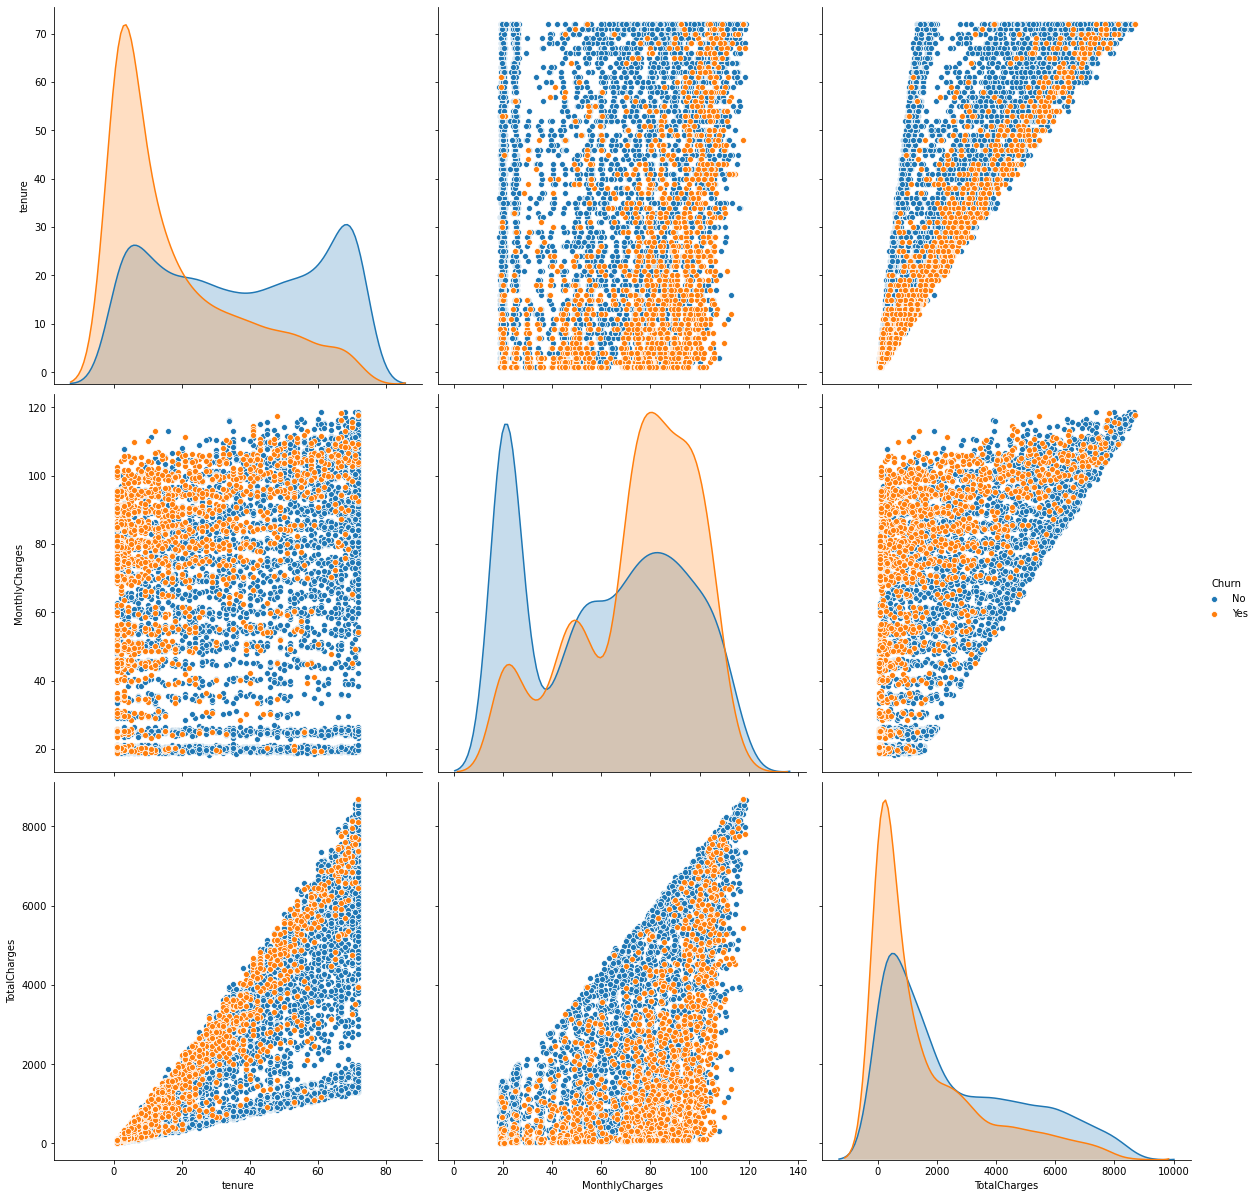

In [16]:
sns.pairplot(data[num_cols+["Churn"]], hue="Churn", height=5.5,diag_kind="kde")

## Customer Churn based on tenure
Based on the plots we have seen so far, there is a big indiction that tenure strongly correlates with Churn, so we need to break it down further

In [17]:
starttime = timeit.default_timer()

data["grouped_tenure"] = data['tenure']
data["grouped_tenure"].replace(range(0,12), '0-12', inplace=True)
data["grouped_tenure"].replace(range(12,24), '12-24', inplace=True)
data["grouped_tenure"].replace(range(24,48), '24-48', inplace=True)
data["grouped_tenure"].replace(range(48,60), '48-60', inplace=True)
data["grouped_tenure"].replace(range(60,73), '60+', inplace=True)
endtime=timeit.default_timer()
print("The time difference is :", endtime - starttime)


The time difference is : 0.035376923999137944


In [18]:
replace_tenure = [(range(0,12), '0-12'),(range(12,24), '12-24'),(range(24,48), '24-48'),(range(48,60), '48-60'),(range(60,73), '60+')]
data["grouped_tenure"] = data['tenure']
for i, x in replace_tenure:
    data["grouped_tenure"].replace(i, x, inplace=True)
    


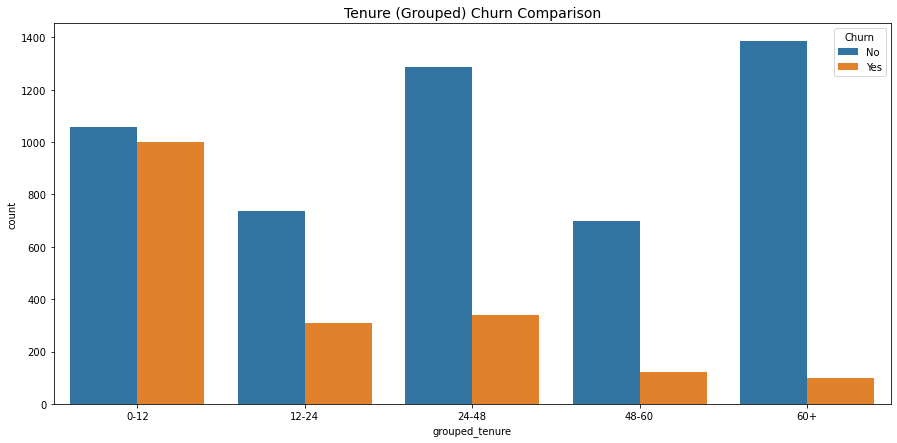

In [19]:
plt.figure(figsize=(15,7))
plt.title('Tenure (Grouped) Churn Comparison', fontsize=14)
sns.countplot(data=data, x='grouped_tenure',hue='Churn', order=sorted(data['grouped_tenure'].value_counts().index))

From the barchart, we can deduce that the number of people churning increases the shorter their tenure is.